In [ ]:
#**Installing Ultralytics**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

#**Importing our Customized Dataset from our local system to runtime in a zip file**
- (Combination of Carpkdataset and our own labeled dataset)

In [ ]:
from google.colab import files
import zipfile
import os

# Uploading the zipped dataset
uploaded = files.upload()

Saving customize_dataset.zip to customize_dataset.zip


#**unzipping the dataset**

In [ ]:
zip_file_name = 'customize_dataset.zip'

# Unzip the dataset
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Verify extraction
os.listdir('/content/dataset')

['customize_dataset']

#**Training Yolov8s Model on our dataset**

In [ ]:
from ultralytics import YOLO

# Load our YOLOv8s model
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/content/dataset/customize_dataset/data.yaml',  # our YAML file path
    epochs=50,  # we can set epochs to 50 or 100 based on time/resources
    imgsz=640,  # image size
    batch=16,   # batch size
    workers=2,  # number of workers for data loading
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 199MB/s]


Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/customize_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 83.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 964.8±287.8 MB/s, size: 34.7 KB)


train: Scanning /content/dataset/customize_dataset/train/labels... 1146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1146/1146 [00:00<00:00, 1491.07it/s]

train: New cache created: /content/dataset/customize_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 628.7±307.2 MB/s, size: 31.0 KB)


val: Scanning /content/dataset/customize_dataset/valid/labels... 319 images, 0 backgrounds, 0 corrupt: 100%|██████████| 319/319 [00:00<00:00, 606.63it/s]

val: /content/dataset/customize_dataset/valid/images/20161225_TPZ_00437_jpg.rf.64173289b4a30b3895478449c0f3b989.jpg: 1 duplicate labels removed
val: New cache created: /content/dataset/customize_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.39G       1.31     0.9654       1.05        898        640: 100%|██████████| 72/72 [00:28<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        319      22406      0.972      0.955      0.982      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.45G      1.082     0.5614     0.9588        712        640: 100%|██████████| 72/72 [00:25<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]

                   all        319      22406      0.977      0.961      0.987        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.18G      1.052     0.5465     0.9456        919        640: 100%|██████████| 72/72 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        319      22406      0.973      0.966       0.99      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.15G      1.047     0.5305     0.9445       1038        640: 100%|██████████| 72/72 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        319      22406      0.981      0.966       0.99      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.45G      1.001     0.5039     0.9378        733        640: 100%|██████████| 72/72 [00:24<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]

                   all        319      22406      0.983      0.976      0.993      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.03G     0.9959     0.5003     0.9337        838        640: 100%|██████████| 72/72 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]

                   all        319      22406      0.979      0.975      0.993      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       6.3G     0.9901      0.492     0.9263       1023        640: 100%|██████████| 72/72 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        319      22406      0.983      0.979      0.993      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.58G     0.9483     0.4632     0.9178        875        640: 100%|██████████| 72/72 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        319      22406      0.983      0.978      0.993       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.87G     0.9485     0.4564     0.9138        627        640: 100%|██████████| 72/72 [00:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.986      0.978      0.993      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.41G     0.9358     0.4544     0.9144        923        640: 100%|██████████| 72/72 [00:25<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

                   all        319      22406      0.986      0.981      0.994       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.61G     0.9351     0.4495      0.915        919        640: 100%|██████████| 72/72 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        319      22406      0.984      0.984      0.994      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.43G     0.9095     0.4401     0.9084        731        640: 100%|██████████| 72/72 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        319      22406      0.988      0.984      0.994      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.79G      0.906     0.4316     0.9075        718        640: 100%|██████████| 72/72 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]

                   all        319      22406      0.987      0.982      0.994      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.91G     0.9024     0.4341     0.9045        774        640: 100%|██████████| 72/72 [00:25<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        319      22406      0.987      0.983      0.994      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.32G     0.8984     0.4255     0.9036        788        640: 100%|██████████| 72/72 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        319      22406      0.986      0.988      0.994      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       7.6G     0.8989      0.426     0.9038        671        640: 100%|██████████| 72/72 [00:24<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        319      22406      0.987      0.986      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.01G     0.8843     0.4157     0.9011        968        640: 100%|██████████| 72/72 [00:24<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

                   all        319      22406      0.986      0.988      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.54G     0.8741     0.4121     0.8948        639        640: 100%|██████████| 72/72 [00:25<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        319      22406      0.987      0.989      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.36G     0.8909     0.4157     0.9007        801        640: 100%|██████████| 72/72 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        319      22406      0.988      0.986      0.994      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.61G     0.8678     0.4073      0.896        656        640: 100%|██████████| 72/72 [00:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.989      0.986      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.11G     0.8664      0.404     0.8942       1032        640: 100%|██████████| 72/72 [00:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        319      22406      0.987      0.989      0.994       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.81G     0.8587     0.3983     0.8967        579        640: 100%|██████████| 72/72 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        319      22406      0.989      0.988      0.994      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       8.1G     0.8443     0.3958     0.8938       1146        640: 100%|██████████| 72/72 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.989       0.99      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.51G     0.8653     0.4051     0.8954        585        640: 100%|██████████| 72/72 [00:25<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]

                   all        319      22406       0.99      0.989      0.994      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.95G     0.8488     0.3927     0.8892       1026        640: 100%|██████████| 72/72 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        319      22406      0.991      0.987      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.91G     0.8351     0.3894     0.8864        847        640: 100%|██████████| 72/72 [00:24<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        319      22406      0.991      0.989      0.994        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.37G      0.843     0.3888       0.89        846        640: 100%|██████████| 72/72 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]

                   all        319      22406       0.99      0.989      0.994      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       7.5G     0.8459      0.389     0.8908        975        640: 100%|██████████| 72/72 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

                   all        319      22406      0.989       0.99      0.994      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.59G     0.8287      0.383     0.8846       1285        640: 100%|██████████| 72/72 [00:24<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]

                   all        319      22406      0.991      0.989      0.994      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.08G     0.8224     0.3772     0.8855        974        640: 100%|██████████| 72/72 [00:25<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        319      22406      0.991      0.989      0.994      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.24G     0.8348      0.382     0.8873        902        640: 100%|██████████| 72/72 [00:24<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.992      0.989      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.63G     0.8305     0.3807     0.8874        850        640: 100%|██████████| 72/72 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        319      22406      0.989       0.99      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       8.2G     0.8206     0.3756     0.8835        775        640: 100%|██████████| 72/72 [00:24<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        319      22406      0.993       0.99      0.994      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.98G     0.8047     0.3701     0.8792       1046        640: 100%|██████████| 72/72 [00:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.991      0.991      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.42G     0.8121     0.3725     0.8792        794        640: 100%|██████████| 72/72 [00:25<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]

                   all        319      22406      0.991      0.991      0.994      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.87G     0.7915     0.3612     0.8787        899        640: 100%|██████████| 72/72 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

                   all        319      22406      0.992      0.991      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.56G     0.8075     0.3651     0.8813        880        640: 100%|██████████| 72/72 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        319      22406      0.992      0.991      0.994      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.14G     0.7958     0.3622     0.8767        553        640: 100%|██████████| 72/72 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]

                   all        319      22406      0.992      0.992      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.14G      0.793     0.3615     0.8749       1265        640: 100%|██████████| 72/72 [00:25<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        319      22406      0.992      0.991      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       5.8G     0.7983     0.3584      0.878       1221        640: 100%|██████████| 72/72 [00:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        319      22406      0.993      0.992      0.994      0.816


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.66G      0.782     0.3461     0.8873        877        640: 100%|██████████| 72/72 [00:25<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]

                   all        319      22406      0.991      0.991      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.63G     0.7694     0.3407     0.8853        606        640: 100%|██████████| 72/72 [00:23<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]

                   all        319      22406      0.991      0.991      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.83G     0.7585     0.3345     0.8792        426        640: 100%|██████████| 72/72 [00:23<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        319      22406      0.991      0.992      0.994      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.13G     0.7612     0.3339     0.8802        467        640: 100%|██████████| 72/72 [00:23<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        319      22406      0.992      0.991      0.994      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.52G      0.753     0.3298     0.8786        550        640: 100%|██████████| 72/72 [00:23<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        319      22406      0.993      0.991      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.86G      0.746     0.3272      0.877        461        640: 100%|██████████| 72/72 [00:23<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        319      22406      0.992      0.992      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.8G      0.739     0.3246     0.8742        633        640: 100%|██████████| 72/72 [00:23<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

                   all        319      22406      0.993      0.992      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.59G     0.7386     0.3232     0.8756        648        640: 100%|██████████| 72/72 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]

                   all        319      22406      0.993      0.991      0.994       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.87G     0.7358      0.321     0.8721        430        640: 100%|██████████| 72/72 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        319      22406      0.993      0.991      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.53G     0.7285     0.3171     0.8719        576        640: 100%|██████████| 72/72 [00:22<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        319      22406      0.993      0.992      0.994      0.824



50 epochs completed in 0.412 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


                   all        319      22406      0.993      0.992      0.994      0.824
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c25d1a3a510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

#**Detecting the vehicles on different files and videos to check the Model ability**


image 1/1 /content/carParkImg.png: 448x640 56 0s, 43.2ms
Speed: 3.5ms preprocess, 43.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


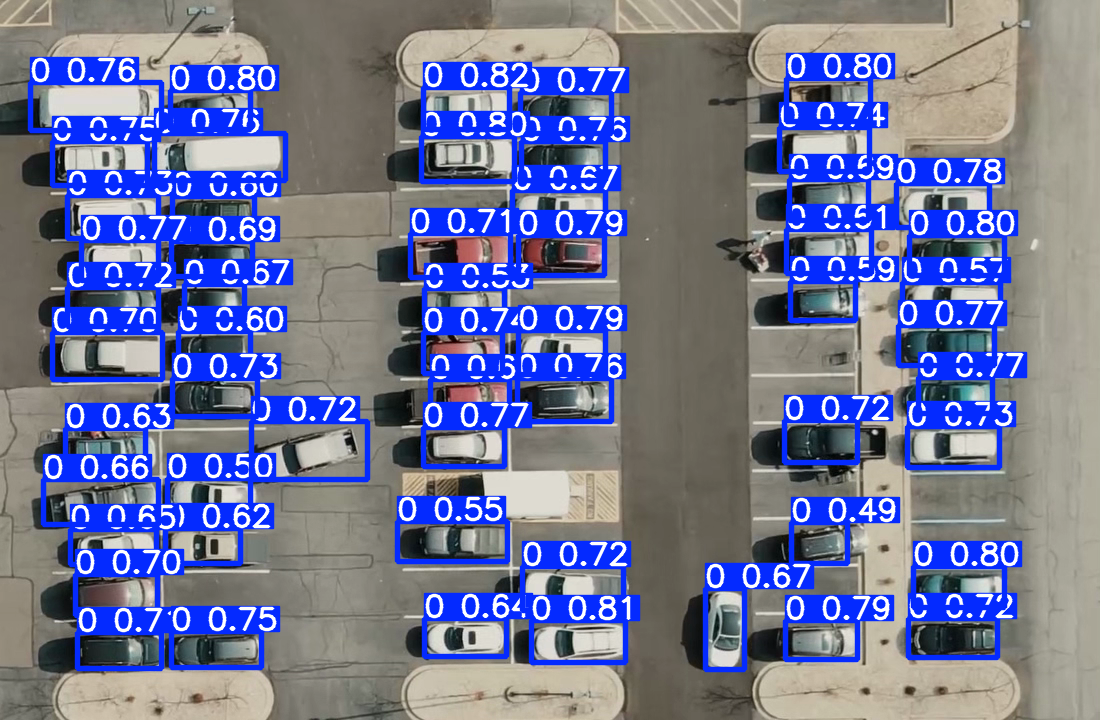

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to our best model

# Make predictions on a new image
results = model.predict('/content/carParkImg.png')

# Plot the results (visualizing the predictions)
results[0].show()

In [ ]:
import cv2

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to our best model


cap = cv2.VideoCapture('/content/carPark.mp4')  # Path to your video file

# Getting the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object to save the output video
out = cv2.VideoWriter('/content/output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform prediction on the frame
    results = model(frame)  # Pass the frame to the YOLO model

    # Annotate the frame with the prediction results (boxes, labels)
    annotated_frame = results[0].plot()  # Draw the bounding boxes and labels on the frame

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release the video capture and writer objects
cap.release()
out.release()

print("Video processing complete! The output video is saved as 'output_video.avi'.")


0: 448x640 59 0s, 13.9ms
Speed: 2.9ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 59 0s, 13.1ms
Speed: 4.0ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 59 0s, 13.4ms
Speed: 4.0ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 60 0s, 13.1ms
Speed: 4.0ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 59 0s, 13.0ms
Speed: 3.1ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 58 0s, 13.1ms
Speed: 3.7ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 59 0s, 13.1ms
Speed: 4.0ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 58 0s, 13.1ms
Speed: 4.2ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 58 0

#**---END---**